# Index
   * [Gather](#Gather)
      - [using csv](#CSV)
      - [using requests to download the file then using tsv](#TSV)
      - [using json](#JSON)
   * [Assess](#Assess)
       * [Quality](#Quality)
       * [Tindenss](#Tidness)
   * [Clean](#Clean)
   * [Visualization](#Visualization)
   * [Store](#Store)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

Gather
===

## CSV

In [3]:
# Read CSV
df_WeRateDogs_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

## TSV

In [15]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Check if the response is ok, if so insert it in the file
if response.status_code == 200:
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response.content)


In [6]:
# Read TSV
df_image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

## JSON

In [17]:
# using exception handling in case there is no file 
tweet_list=[]
try:
    with open('tweet_json_udacity.txt') as file:
        for line in file:
            tweet_list.append(json.loads(file.readline()))
          #print(o)
except NameError as e:
    print(e)
except AttributeError as e:
    print(e)
except:
    print("Error")
len(tweet_list)

1177

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, 
                wait_on_rate_limit_notify=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_WeRateDogs_twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


Rate limit reached. Sleeping for: 280


Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513
Success
34: 8859848

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Rate limit reached. Sleeping for: 198


Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Fail
934

Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
1184: 718939241951195136
Success
11

Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
14

Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
16

Rate limit reached. Sleeping for: 457


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [7]:
# using exception handling in case there is no file 
tweet_list=[]
try:
    with open('tweet_json.txt') as file:
        for line in file:
            tweet_list.append(json.loads(file.readline()))
          #print(o)
except NameError as e:
    print(e)
except AttributeError as e:
    print(e)
except:
    print("Error")
len(tweet_list)

1165

In [9]:
json_df=pd.DataFrame(tweet_list)

Check if the json in already in the csv file 

In [6]:
(~json_df.id.isin(df_WeRateDogs_twitter_archive.tweet_id)).sum()

0

## Assess

In [134]:
df_WeRateDogs_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [135]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
881,698703483621523456,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1393,767191397493538821,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False


In [9]:
list(json_df.extended_entities)[0]

{'media': [{'id': 892177413194625024,
   'id_str': '892177413194625024',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'url': 'https://t.co/0Xxu71qeIV',
   'display_url': 'pic.twitter.com/0Xxu71qeIV',
   'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'},
    'small': {'w': 598, 'h': 680, 'resize': 'fit'},
    'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}

In [10]:
list(json_df.entities)[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892177413194625024,
   'id_str': '892177413194625024',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'url': 'https://t.co/0Xxu71qeIV',
   'display_url': 'pic.twitter.com/0Xxu71qeIV',
   'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'},
    'small': {'w': 598, 'h': 680, 'resize': 'fit'},
    'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}

In [11]:
json_df[json_df.contributors.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [12]:
json_df[json_df.coordinates.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [13]:
json_df.display_text_range

0        [0, 138]
1         [0, 79]
2        [0, 138]
3        [0, 118]
4        [0, 133]
5        [0, 107]
6         [0, 91]
7        [0, 138]
8        [0, 128]
9        [0, 127]
10       [0, 108]
11        [0, 88]
12       [0, 101]
13        [0, 71]
14      [27, 105]
15        [0, 50]
16       [0, 109]
17       [0, 133]
18        [0, 93]
19        [0, 66]
20       [0, 104]
21       [0, 137]
22       [0, 139]
23       [0, 108]
24       [0, 136]
25       [0, 133]
26       [0, 115]
27       [0, 130]
28        [0, 72]
29       [0, 114]
          ...    
1135     [0, 106]
1136     [0, 135]
1137      [0, 39]
1138     [0, 105]
1139     [0, 138]
1140      [0, 50]
1141     [0, 135]
1142     [0, 107]
1143     [0, 140]
1144      [0, 99]
1145     [0, 140]
1146     [0, 119]
1147     [0, 125]
1148     [0, 116]
1149     [0, 138]
1150     [0, 139]
1151      [0, 81]
1152     [0, 135]
1153     [0, 139]
1154     [0, 136]
1155      [0, 82]
1156     [0, 128]
1157     [0, 132]
1158     [0, 137]
1159     [

In [14]:
json_df[~json_df.geo.isna()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [15]:
json_df.lang.value_counts()

en     1158
und       3
in        2
tl        1
eu        1
Name: lang, dtype: int64

In [16]:
json_df[json_df.possibly_sensitive==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


___

In [17]:
json_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       1165 non-null object
display_text_range               1165 non-null object
entities                         1165 non-null object
extended_entities                1034 non-null object
favorite_count                   1165 non-null int64
favorited                        1165 non-null bool
full_text                        1165 non-null object
geo                              0 non-null object
id                               1165 non-null int64
id_str                           1165 non-null object
in_reply_to_screen_name          36 non-null object
in_reply_to_status_id            36 non-null float64
in_reply_to_status_id_str        36 non-null object
in_reply_to_user_id              36 non-null float64
in_reply_to_user_id_str          36 non-null obj

In [18]:
json_df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

` df_WeRateDogs_twitter_archive` table
* Categorical or Qualitative data
    - tweet_id
    - in_reply_to_status_id
    - in_reply_to_user_id
    - timestamp
    - source
    - text
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls
    - name
    - doggo
    - floofer
    - pupper
    - puppo

* Numerical or Quantitative data
    - rating_numerator
    - rating_denominator

In [19]:
df_WeRateDogs_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

----

` df_image_predictions` table
* Categorical or Qualitative data
    - tweet_id
    - jpg_url
    - p1
    - p1_dog
    - p2
    - p2_dog
    - p3
    - p3_dog

* Numerical or Quantitative data
    - img_num
    - p1_conf
    - p2_conf
    - p3_conf

In [20]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


_____________

***All Categorical data should be string*** except id, actually it will be a little confusing.
According to [stackoverflow](https://stackoverflow.com/questions/2551776/database-design-primay-key-id-vs-string) *as string may take more space* but this for database may be different from we use.
According to [Twitter](https://developer.twitter.com/en/docs/twitter-ids) we'd better use string and that they will be made in the newer version as they said *"you should always use the string representation of the number to avoid losing accuracy."* and [here](https://blog.twitter.com/developer/en_us/a/2013/64-bit-twitter-user-idpocalypse.html) said _"we strongly suggest using the “id-str” property instead"_ and *"“id-str” continues to be the best way to access any ID in the system, **even for platforms which support 64-bit integers.**"* So we will use string.
<br>And at the timestamp, we can use string but better to use DateTime to be easy using it.
<br> we can also leave boolean variables as they are  

***All Numerical data should be integer or float***


In [21]:
# Check for duplication in tweet_id 
df_WeRateDogs_twitter_archive.tweet_id.duplicated().sum()

0

In [22]:
# Check for duplication in expanded_urls
df_WeRateDogs_twitter_archive[(df_WeRateDogs_twitter_archive.expanded_urls.duplicated()) & (~df_WeRateDogs_twitter_archive.expanded_urls.isna())].expanded_urls.size

79

In [23]:
d=df_WeRateDogs_twitter_archive.expanded_urls.dropna()
d[d.duplicated()]

75      https://www.gofundme.com/3yd6y1c,https://twitt...
76      https://twitter.com/dog_rates/status/878057613...
98      https://www.gofundme.com/help-my-baby-sierra-g...
126     https://www.gofundme.com/3ti3nps,https://twitt...
135     https://twitter.com/dog_rates/status/866450705...
136     https://twitter.com/dog_rates/status/866334964...
150     https://www.gofundme.com/helpquinny,https://tw...
161     https://www.gofundme.com/help-lorenzo-beat-can...
169     https://twitter.com/dog_rates/status/859196978...
253     https://twitter.com/dog_rates/status/844704788...
264     https://twitter.com/dog_rates/status/842163532...
271     https://twitter.com/dog_rates/status/841077006...
276     https://www.gofundme.com/3hgsuu0,https://twitt...
280     https://twitter.com/dog_rates/status/839549326...
293     https://twitter.com/dog_rates/status/837820167...
312     https://www.gofundme.com/lolas-life-saving-sur...
330     https://twitter.com/dog_rates/status/833124694...
338     https:

In [24]:
list(df_WeRateDogs_twitter_archive[(df_WeRateDogs_twitter_archive.expanded_urls.duplicated()) & (~df_WeRateDogs_twitter_archive.expanded_urls.isna())].expanded_urls)[77]

'https://twitter.com/dog_rates/status/667138269671505920/photo/1'

In [25]:
df_WeRateDogs_twitter_archive[(df_WeRateDogs_twitter_archive.rating_denominator !=10) &
                              (~df_WeRateDogs_twitter_archive.name.isna()) & 
                             (df_WeRateDogs_twitter_archive.name != 'None')].loc[1202]

tweet_id                                                     716439118184652801
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-04-03 01:36:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bluebert. He just saw that both #Final...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                             50
rating_denominator                                                           50
name                                    

In [26]:
# Count number of url in one record should be one
len(list(df_WeRateDogs_twitter_archive[df_WeRateDogs_twitter_archive.tweet_id==758854675097526272].expanded_urls.str.split(","))[0])

4

In [27]:
# Count number of url in one record should be one
len(list(df_WeRateDogs_twitter_archive[df_WeRateDogs_twitter_archive.tweet_id==668623201287675904].expanded_urls.str.split(","))[0])

4

In [28]:
# Count number of url in one record should be one
len(list(df_WeRateDogs_twitter_archive[df_WeRateDogs_twitter_archive.tweet_id==756998049151549440].expanded_urls.str.split(","))[0])

4

In [29]:
df_WeRateDogs_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Quality
`df_WeRateDogs_twitter_archive` table
1. **Validity**
    - [tweet_id should be int64 not string](#tweet_id-is-duplicated-in-both-tables)
    - [Any row has in_reply_to_status_id not Nullable should be removed.](#Any-row-has-in_reply_to_status_id--in-df_WeRateDogs_twitter_archive_clean-table-not-Nullable-should-be-removed.)  
    - Some expanded url are not found as (https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1)
    
<br>

2. **Accuracy**
    - [timestamp string not datetime](#timestamp-string-not-datetime)
    - [Inaccurate name as 'a, an, O, very, None, this...'](#Inaccurate-name-as-'a,-an,-O,-very,-None,-this...')
    - [Some rating_denominator are not 10](#Some-rating_denominator-are-not-10)
    - [More than one observation are duplicated (Some expanded url are duplicated )](#More-than-one-observation-are-duplicated-(Some-expanded-url-are-duplicated))

<br>

3. **Completeness**
    - Missing records in expanded_urls (2297 instead of 2356)

<br>

`df_image_predictions` table
1. **Accuracy**
    - [tweet_id should be string not int64](#tweet_id-should-be-string-not-int)
    - Some times neural network predict wrong as here https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
    - Many dogs in one photo and this hard to visualize and detect by the neural network

<br>  
2. **Completeness**
    - Missing record (2075 instead 2356)
    
`json_df` table
1. **Accuracy**
    - [id_str string not category](#id_str-string-not-category-in-json_df-table)

2. **In Consistent**
    - [full_text column should be text](#Renaming-column)
    - [id_str column should be tweet_id](#Renaming-column)


## Tidness
`df_WeRateDogs_twitter_archive`
- [<font color="black">The source should contain from where the tweet was posted (Android, iPhone, Web App.. etc).</font>](#The-source-in-df_WeRateDogs_twitter_archive-table-should-contain-from-where-the-tweet-was-posted-(Android,-iPhone,-Web-App..etc))
- [<font color="black">No need to retweeted_status_id...</font>](#No-need-to-retweeted_status_id...-in--df_WeRateDogs_twitter_archive-table)
- [<font color="black">(doggo, pupper , puppo, floofer) use 4 columns instead of 1</font>](#(doggo,-pupper-,-puppo,-floofer)-use-4-columns-instead-of-1)
- [<font color="black">Some expand url are duplicated at the same record as in id 668623201287675904</font>](#Some-expand_urls-are-duplicated-at-the-same-record-as-in-id-668623201287675904-in-df_WeRateDogs_twitter_archive-table)
- [<font color="black">Remove-the-in_reply_to_status_id-and-in_reply_to_user_id after removing the non null rows as we needn't them now</font>](#Remove-the-in_reply_to_status_id-and-in_reply_to_user_id-as-we-didn't-need-them)

`json_df` table
 - [<font color="black">No need to coordinates, contributors, entities, extended_entities, geo, display_text_range, id, in_reply_to_screen_name, in_reply_to_status_id_str, is_quote_status, quoted_status_id, lang, possibly_sensitive, possibly_sensitive_appealable, place, quoted_status_id, quoted_status_id_str, retweeted, source, truncated, user </font>](#Remove-non-needed-columns)

[<font color="black">tweet_id is duplicated in both tables</font>](#tweet_id-is-duplicated-in-both-tables)


## Clean

In [10]:
# Copy df to not change the original one
df_WeRateDogs_twitter_archive_clean = df_WeRateDogs_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
json_df_clean = json_df.copy()

#### Renaming column
To be able to merge it in Tidness

#### Define
Renaming columns using [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [32]:
json_df_clean=json_df_clean.rename(columns={'id_str':'tweet_id',
                      'full_text': 'text'
    
})

#### Test

In [33]:
json_df_clean.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
801,None,None,Wed Jan 06 04:11:43 +0000 2016,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4018,False,This pupper just got his first kiss. 12/10 he'...,None,...,NaN,NaN,NaN,NaN,1376,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Tidiness

#### **The source in `df_WeRateDogs_twitter_archive` table should contain from where the tweet was posted (Android, iPhone, Web App..etc)**

#### Define
Extract the type of the device or the place from where the tweet was posted using [extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) 
 

#### Code

In [34]:
df_WeRateDogs_twitter_archive_clean.source=df_WeRateDogs_twitter_archive_clean.source.str.extract(r'(>[\w ]+)')[0].str[1:]#<a href="http://twitter.com" rel="nofollow">Twitter')

#### Test

In [35]:
df_WeRateDogs_twitter_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine ', 'TweetDeck'],
      dtype=object)

In [36]:
df_WeRateDogs_twitter_archive_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [37]:
df_WeRateDogs_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,Twitter for iPhone,Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
1440,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,Twitter for iPhone,Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,Twitter for iPhone,I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,Twitter for iPhone,This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,Twitter for iPhone,This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None


_______

#### **No need to retweeted_status_id...** in  `df_WeRateDogs_twitter_archive` table 

#### Define

Drop the retweeted_status_id... tables using [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

#### Code

In [38]:
df_WeRateDogs_twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [39]:
df_WeRateDogs_twitter_archive_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
839,767191397493538821,NaN,NaN,2016-08-21 02:47:37 +0000,Twitter for iPhone,I don't know any of the backstory behind this ...,https://twitter.com/dog_rates/status/767191397...,13,10,None,doggo,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,Twitter for iPhone,This is Tommy. He's a cool dog. Hard not to st...,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02 +0000,Twitter for iPhone,This is Adele. Her tongue flies out of her mou...,https://twitter.com/dog_rates/status/705975130...,10,10,Adele,None,None,pupper,None
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,Twitter for iPhone,This is Winnie. She's not a fan of the fast mo...,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None


____

#### (doggo, pupper , puppo, floofer) use 4 columns instead of 1

#### Define
Make a new Series using [pandas.Series](), add four columns 
remove the None and 

#### Code

In [40]:
df_WeRateDogs_twitter_archive_clean["stage"] = pd.Series(df_WeRateDogs_twitter_archive_clean.doggo+df_WeRateDogs_twitter_archive_clean.floofer+
                                                         df_WeRateDogs_twitter_archive_clean.pupper+df_WeRateDogs_twitter_archive_clean.puppo)

In [41]:
df_WeRateDogs_twitter_archive_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [42]:
# Replace each none with ""
df_WeRateDogs_twitter_archive_clean.stage.replace(r"(None)+","",regex=True, inplace=True)
df_WeRateDogs_twitter_archive_clean.stage.replace("","No stage", inplace=True)
df_WeRateDogs_twitter_archive_clean.stage.replace("doggofloofer","doggo, floofer", inplace=True)
df_WeRateDogs_twitter_archive_clean.stage.replace("doggopupper","doggo, pupper", inplace=True)
df_WeRateDogs_twitter_archive_clean.stage.replace("doggopuppo","doggo, puppo", inplace=True)

#### Test

In [43]:
df_WeRateDogs_twitter_archive_clean.stage.unique()

array(['No stage', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [44]:
df_WeRateDogs_twitter_archive_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52 +0000,Twitter Web Client,This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,None,None,None,None,No stage
2299,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,Twitter for iPhone,Here we have a Hufflepuff. Loves vest. Eyes wi...,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None,No stage
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,Twitter for iPhone,RT @Jenna_Marbles: @dog_rates Thanks for ratin...,NaN,14,10,None,None,None,None,None,No stage
456,818259473185828864,NaN,NaN,2017-01-09 00:53:55 +0000,Twitter for iPhone,This is Florence. He saw the same snap you sen...,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,None,None,None,None,No stage


#### Define
Now no need to the four column 
let's remove them using [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

#### Code

In [45]:
df_WeRateDogs_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [46]:
df_WeRateDogs_twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,Twitter for iPhone,Meet Tango. He's a large dog. Doesn't care muc...,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,No stage


#### **Some expand_urls are duplicated at the same record as in id 668623201287675904 in `df_WeRateDogs_twitter_archive` table**

#### Define
Extract one url from expand_urls using [extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) 
 

#### Code

In [47]:
df_WeRateDogs_twitter_archive_clean.expanded_urls=df_WeRateDogs_twitter_archive_clean.expanded_urls.str.extract('([\w:/.]+)')


#### Test

In [48]:
len(list(df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.tweet_id==758854675097526272].expanded_urls.str.split(","))[0])

1

In [49]:
len(list(df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.tweet_id==668623201287675904].expanded_urls.str.split(","))[0])

1

In [50]:
len(list(df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.tweet_id==756998049151549440].expanded_urls.str.split(","))[0])

1

---

#### Remove non needed columns

#### Define
Use [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to remove any needn't column in `json_df` table 

#### Code

In [51]:
json_df_clean.drop(['coordinates', 'contributors', 'entities', 'extended_entities',
                    'geo', 'display_text_range', 'id', 'in_reply_to_screen_name', 
                    'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 
                    'is_quote_status', 'quoted_status_id', 'lang', 'possibly_sensitive',
                    'possibly_sensitive_appealable', 'place', 'quoted_status_id', 'in_reply_to_user_id_str',
                    'quoted_status_id_str', 'retweeted', 'source', 'truncated', 'user', 
                    'retweeted_status', 'created_at'], axis=1, inplace=True)

#### Test

In [52]:
json_df_clean.head()

,favorite_count,favorited,text,tweet_id,quoted_status,quoted_status_permalink,retweet_count
0,30764,False,This is Tilly. She's just checking pup on you....,892177421306343426,NaN,NaN,5576
1,38818,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,NaN,NaN,7693
2,18709,False,Here we have a majestic great white breaching ...,891087950875897856,NaN,NaN,2780
3,59922,False,When you watch your owner call another dog a g...,890729181411237888,NaN,NaN,16831
4,29382,False,This is Cassie. She is a college pup. Studying...,890240255349198849,NaN,NaN,6536


#### tweet_id is duplicated in both tables


#### Define
 mege two table using [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) except jpg_url as we needn't it as we have the main post
 

#### Code

In [53]:
id_twitter = df_image_predictions_clean[["tweet_id","img_num","p1","p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]]

In [54]:
id_twitter.sample()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1849,839990271299457024,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.31154,True,Boston_bull,0.037159,True


In [55]:
WeRateDogs_image_predictions = df_WeRateDogs_twitter_archive_clean.merge(id_twitter, how="left", on="tweet_id")

#### Test

In [56]:
WeRateDogs_image_predictions.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,Vine,This is Rascal. He's paddling an imaginary can...,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----

### Quality

#### **tweet_id should be string not int**

#### id_str string not category in ` json_df` table

### Define
change type of tweet_ids to category using [astye()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)
According [this website](https://pbpython.com/pandas_dtypes_cat.html) 
*The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data*

#### Code

In [57]:
df_WeRateDogs_twitter_archive_clean.tweet_id=df_WeRateDogs_twitter_archive_clean.tweet_id.astype('category')

In [58]:
df_image_predictions_clean.tweet_id=df_image_predictions_clean.tweet_id.astype('category')

In [59]:
WeRateDogs_image_predictions.tweet_id=WeRateDogs_image_predictions.tweet_id.astype('category')

In [60]:
# Since we rename id_str to tweet_id
json_df_clean.tweet_id=json_df_clean.tweet_id.astype('category')

#### Test

In [61]:
df_WeRateDogs_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null category
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
stage                    2356 non-null object
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 287.1+ KB


In [62]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null category
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 236.1+ KB


In [63]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 7 columns):
favorite_count             1165 non-null int64
favorited                  1165 non-null bool
text                       1165 non-null object
tweet_id                   1165 non-null category
quoted_status              16 non-null object
quoted_status_permalink    18 non-null object
retweet_count              1165 non-null int64
dtypes: bool(1), category(1), int64(2), object(3)
memory usage: 98.1+ KB


______

#### Any row has in_reply_to_status_id  in `df_WeRateDogs_twitter_archive_clean` table not Nullable should be removed.

#### Define
Using indexing to get nullable only

#### Code

In [64]:
df_WeRateDogs_twitter_archive_clean=df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.in_reply_to_status_id.isna()]

In [65]:
WeRateDogs_image_predictions=WeRateDogs_image_predictions[WeRateDogs_image_predictions.in_reply_to_status_id.isna()]

#### Test

In [66]:
df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [67]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Remove the in_reply_to_status_id and in_reply_to_user_id as we didn't need them

#### Define
Remove in_reply_to_status_id and in_reply_to_user_id using [drop() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) 

#### Code

In [68]:
df_WeRateDogs_twitter_archive_clean=df_WeRateDogs_twitter_archive_clean.drop(["in_reply_to_status_id","in_reply_to_user_id"], axis=1)

In [69]:
WeRateDogs_image_predictions=WeRateDogs_image_predictions.drop(["in_reply_to_status_id","in_reply_to_user_id"], axis=1)

#### Test

In [70]:
df_WeRateDogs_twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2120,670411370698022913,2015-11-28 01:18:21 +0000,Twitter for iPhone,Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,No stage


In [71]:
WeRateDogs_image_predictions.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1812,676811746707918848,2015-12-15 17:11:09 +0000,Twitter for iPhone,Say hello to Penny &amp; Gizmo. They are pract...,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,No stage,1.0,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True


----

#### timestamp string not datetime

#### Define
Using [to_dateime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert it to datetime

#### Code

In [72]:

df_WeRateDogs_twitter_archive_clean.timestamp=pd.to_datetime(df_WeRateDogs_twitter_archive_clean.timestamp.str[:19])

In [73]:
WeRateDogs_image_predictions.timestamp=pd.to_datetime(WeRateDogs_image_predictions.timestamp.str[:19])

#### Test

In [74]:
df_WeRateDogs_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2278 non-null category
timestamp             2278 non-null datetime64[ns]
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 2278 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 263.0+ KB


In [75]:
WeRateDogs_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id              2278 non-null category
timestamp             2278 non-null datetime64[ns]
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 2278 non-null object
img_num               2052 non-null float64
p1                    2052 non-null object
p1_conf               2052 non-null float64
p1_dog                2052 non-null object
p2                    2052 non-null object
p2_conf               2052 non-null float64
p2_dog                2052 non-null object
p3                    2052 non-null object
p3_conf               2052 non-null float64
p3_dog                2052 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), ob

#### Inaccurate name as 'a, an, O, very, None, this...'
 in table `df_WeRateDogs_twitter_archive_clean`

#### Define

#### Code

In [76]:
df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.name=='a'].tweet_id.isin(json_df_clean.tweet_id)

56      False
649     False
801     False
1002    False
1004    False
1017    False
1049    False
1193    False
1207    False
1340    False
1351    False
1361    False
1368    False
1382    False
1499    False
1737    False
1785    False
1853    False
1854    False
1877    False
1878    False
1923    False
1941    False
1955    False
1994    False
2034    False
2066    False
2116    False
2125    False
2128    False
2146    False
2153    False
2161    False
2191    False
2198    False
2211    False
2218    False
2222    False
2235    False
2249    False
2255    False
2264    False
2273    False
2287    False
2304    False
2311    False
2314    False
2327    False
2334    False
2347    False
2348    False
2350    False
2352    False
2353    False
2354    False
Name: tweet_id, dtype: bool

In [77]:
json_df_clean[df_WeRateDogs_twitter_archive_clean.loc[1049].tweet_id==json_df_clean.tweet_id].quoted_status

Series([], Name: quoted_status, dtype: object)

In [78]:
json_df_clean[df_WeRateDogs_twitter_archive_clean.loc[2327].tweet_id==json_df_clean.tweet_id].quoted_status

Series([], Name: quoted_status, dtype: object)

Since all key in not in json_df or nan, so we can't fix 'a'

In [79]:
df_WeRateDogs_twitter_archive_clean[df_WeRateDogs_twitter_archive_clean.name=='an'].tweet_id.isin(json_df_clean.tweet_id)

759     False
1025    False
1362    False
2204    False
2333    False
2335    False
2349    False
Name: tweet_id, dtype: bool

In [80]:
json_df_clean.loc[1025].quoted_status

nan

In [81]:
df_WeRateDogs_twitter_archive_clean[(df_WeRateDogs_twitter_archive_clean.name=='None') &
                                   (df_WeRateDogs_twitter_archive_clean.index < 2000)].tweet_id.isin(json_df_clean.tweet_id)

5       False
7       False
12      False
24      False
25      False
32      False
35      False
37      False
41      False
42      False
47      False
59      False
62      False
72      False
78      False
83      False
88      False
89      False
93      False
96      False
99      False
100     False
101     False
103     False
110     False
112     False
125     False
127     False
130     False
131     False
        ...  
1896    False
1901    False
1902    False
1903    False
1904    False
1907    False
1918    False
1928    False
1929    False
1932    False
1935    False
1938    False
1939    False
1942    False
1943    False
1947    False
1949    False
1958    False
1959    False
1960    False
1963    False
1966    False
1969    False
1972    False
1978    False
1979    False
1986    False
1991    False
1997    False
1999    False
Name: tweet_id, Length: 556, dtype: bool

In [82]:
json_df_clean.loc[112].quoted_status

nan

#### Test

_________

#### More than one observation are duplicated (Some expanded url are duplicated)

#### Define
Use indexing to remove duplication

#### Code

In [83]:
df_WeRateDogs_twitter_archive_clean=df_WeRateDogs_twitter_archive_clean[~(df_WeRateDogs_twitter_archive_clean.expanded_urls.duplicated())]

In [84]:
WeRateDogs_image_predictions=WeRateDogs_image_predictions[~(WeRateDogs_image_predictions.expanded_urls.duplicated())]

#### Test

In [85]:
df_WeRateDogs_twitter_archive_clean[(df_WeRateDogs_twitter_archive_clean.expanded_urls.duplicated()) & (~df_WeRateDogs_twitter_archive_clean.expanded_urls.isna())].expanded_urls.size

0

In [86]:
WeRateDogs_image_predictions[(WeRateDogs_image_predictions.expanded_urls.duplicated()) & (~WeRateDogs_image_predictions.expanded_urls.isna())].expanded_urls.size

0

In [87]:
df_WeRateDogs_twitter_archive_clean.shape

(2113, 9)

--------------

#### Some rating_denominator are not 10

#### Define
map all the rating from any value to values 10 at the denominator
and map the same ratio to the rating numerator

#### Code

In [88]:
rate=WeRateDogs_image_predictions.rating_denominator 
rate_num=WeRateDogs_image_predictions.rating_numerator 

rate_num = (rate_num/rate)*10

In [89]:
WeRateDogs_image_predictions.rating_denominator = 10

In [90]:
WeRateDogs_image_predictions.rating_numerator = rate_num

#### Test

In [91]:
(WeRateDogs_image_predictions.rating_denominator>10).sum()

0

-------------

#### Define
Now we needn't the tweet_id

#### Code

In [92]:
df_WeRateDogs_twitter_archive_clean.drop(["tweet_id"], axis=1, inplace=True)

#### Test

In [93]:
df_WeRateDogs_twitter_archive_clean.sample()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
798,2016-09-05 19:22:09,Twitter Web Client,You need to watch these two doggos argue throu...,https://twitter.com/dog_rates/status/772877495...,11,10,None,No stage


#### Define 
Remove any nan image_prediction rows in `WeRateDogs_image_predictions` tables
we will use img_num as it has no null in the image_prediction table

#### Code

In [94]:
WeRateDogs_image_predictions=WeRateDogs_image_predictions[~WeRateDogs_image_predictions.img_num.isnull()]

#### Test

In [95]:
(WeRateDogs_image_predictions.img_num.isnull()).sum()

0

#### Define
Merge the WeRateDogs_image_predictions with json_df using [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

#### Code

In [96]:
json_df_clean.sample()

,favorite_count,favorited,text,tweet_id,quoted_status,quoted_status_permalink,retweet_count
1144,173,False,This is Christoper. He is a spotted Penne. Can...,666691418707132416,NaN,NaN,44


In [97]:
id_json = json_df_clean[['tweet_id', 'favorite_count', 'retweet_count']]

In [98]:
(id_json.tweet_id.isin(WeRateDogs_image_predictions.tweet_id)).sum()

0

In [99]:
WeRateDogs_image_predictions = WeRateDogs_image_predictions.merge(id_json, how='left', on="tweet_id")

#### Test

In [100]:
WeRateDogs_image_predictions.shape

(1904, 21)

In [101]:
(~WeRateDogs_image_predictions.favorite_count.isnull()).sum()

0

### Visualization

Make some visualization using [plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

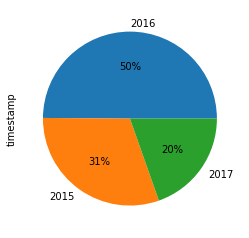

In [102]:
# most popular year
df_WeRateDogs_twitter_archive_clean.timestamp.dt.year.value_counts().plot(kind='pie', autopct='%1.0f%%');

WeRateDogs tweet many tweets at 2016 then begin to decrease number of tweet at 2017 even less than 2015, but we didn't know if WeRateDogs starts at the begining 2015 or last of 2015


Text(0, 0.5, 'Number of Tweets')

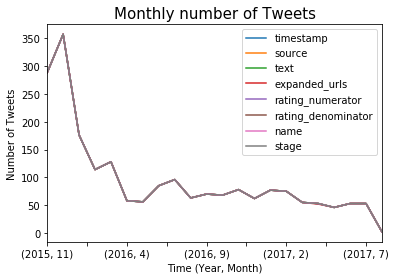

In [103]:
selected_data = df_WeRateDogs_twitter_archive_clean.groupby([df_WeRateDogs_twitter_archive_clean['timestamp'].dt.year,
                                                            df_WeRateDogs_twitter_archive_clean['timestamp'].dt.month]).count()
selected_data.plot(kind='line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')

So, WeRateDogs started tweeting many tweets then decreased tweeting.

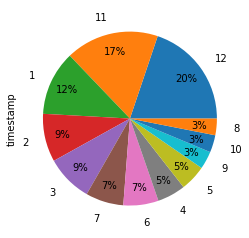

In [104]:
# most popular month
df_WeRateDogs_twitter_archive_clean.timestamp.dt.month.value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2);

Text(0.5, 0, 'Month')

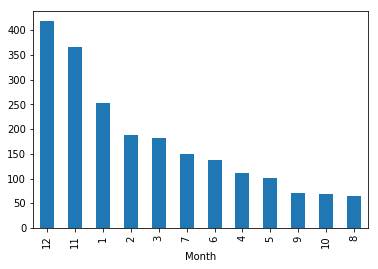

In [105]:
# most popular month
df_WeRateDogs_twitter_archive_clean.timestamp.dt.month.value_counts().plot(kind='bar');
plt.xlabel("Month")


WeRateDogs tends to tweet at the end of the month, or this ,may be because of 2015

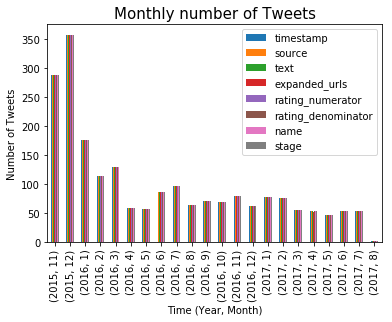

In [106]:
selected_data = df_WeRateDogs_twitter_archive_clean.groupby([df_WeRateDogs_twitter_archive_clean['timestamp'].dt.year,
                                                            df_WeRateDogs_twitter_archive_clean['timestamp'].dt.month]).count()
selected_data.plot(kind='bar')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets');

Therefore, this is because of 2015, and the most time WeRateDogs tends to rate is at the begining of the year

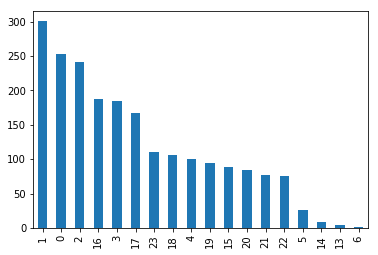

In [107]:
# most popular hour
df_WeRateDogs_twitter_archive_clean.timestamp.dt.hour.value_counts().plot(kind='bar');

WeRateDogs tends to tweet in the morning

In [108]:
# most popular time the weratedog likes to post 
(df_WeRateDogs_twitter_archive_clean.timestamp.value_counts()>1).sum()

0

In [109]:
json_df_clean.describe()

,favorite_count,retweet_count
count,1165.000000,1165.000000
mean,7069.972532,2515.472961
std,10403.645029,3894.140754
min,0.000000,1.000000
25%,1249.000000,525.000000
50%,3179.000000,1169.000000
75%,8718.000000,2897.000000
max,114512.000000,39830.000000


There are many comments and love. Hence, the follwers really loves this account.

In [110]:
df_WeRateDogs_twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2113.000000,2113.000000
mean,12.189778,10.445338
std,40.212285,6.619957
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


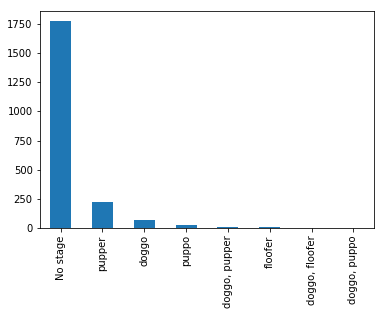

In [111]:
df_WeRateDogs_twitter_archive_clean.stage.value_counts().plot(kind='bar');

Most popular stage is pupper

In [112]:
WeRateDogs_image_predictions.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.904000e+03,1904.000000,1904.0,1904.000000,1904.000000,1904.000000,1.904000e+03,0.0,0.0
mean,7.362708e+17,11.676812,10.0,1.196954,0.592830,0.134208,6.042627e-02,NaN,NaN
std,6.780662e+16,41.593569,0.0,0.548797,0.272861,0.100458,5.097565e-02,NaN,NaN
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,NaN,NaN
25%,6.758153e+17,10.000000,10.0,1.000000,0.360084,0.053456,1.647660e-02,NaN,NaN
50%,7.088401e+17,11.000000,10.0,1.000000,0.587797,0.117455,4.952715e-02,NaN,NaN
75%,7.907049e+17,12.000000,10.0,1.000000,0.845599,0.194977,9.152147e-02,NaN,NaN
max,8.924206e+17,1776.000000,10.0,4.000000,0.999984,0.488014,2.734190e-01,NaN,NaN


In [113]:
df_WeRateDogs_twitter_archive_clean.rating_numerator.sort_values(ascending=False)

979     1776
2074     420
1120     204
902      165
1779     144
1635     121
1228      99
1843      88
433       84
1254      80
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
285       15
185       14
447       14
395       14
68        14
404       14
533       14
418       14
268       14
164       14
369       14
924       14
        ... 
2305       3
1601       3
2202       3
2239       3
1314       3
1189       3
2183       3
2136       3
1692       3
1478       3
1947       3
1938       3
1928       3
1406       3
1249       3
2349       2
2079       2
2237       2
2310       2
2246       2
2326       2
1764       2
1761       2
1920       2
2335       1
1869       1
605        1
2091       1
2261       1
315        0
Name: rating_numerator, Length: 2113, dtype: int64

In [12]:
df_WeRateDogs_twitter_archive_clean.loc[979].expanded_urls

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

It seems that the WeRateDogs admin loves his country very much

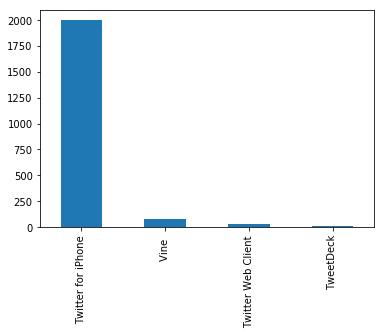

In [115]:
df_WeRateDogs_twitter_archive_clean.source.value_counts().plot(kind="bar");

Most WeRateDogs admins uses iphone

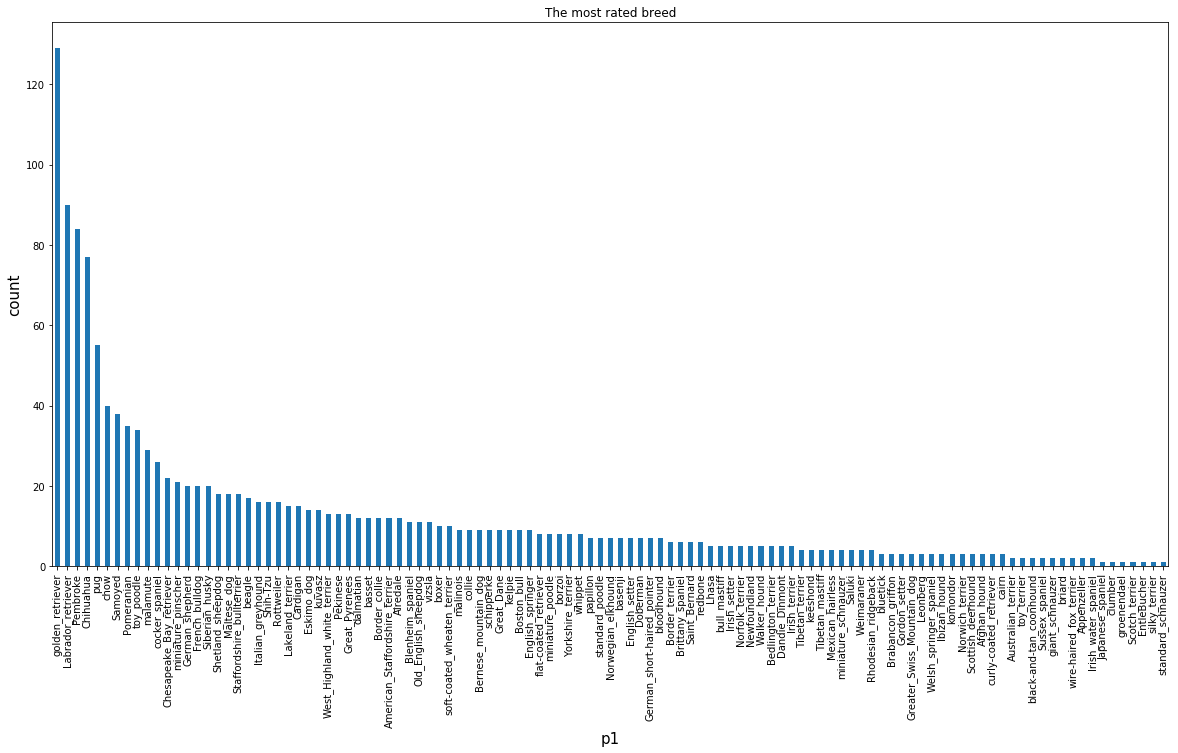

In [116]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p1_dog==True].p1.value_counts().plot(kind='bar', figsize=(20,10));
plt.title("The most rated breed");
plt.xlabel("p1", fontsize=15);
plt.ylabel("count", fontsize=15);

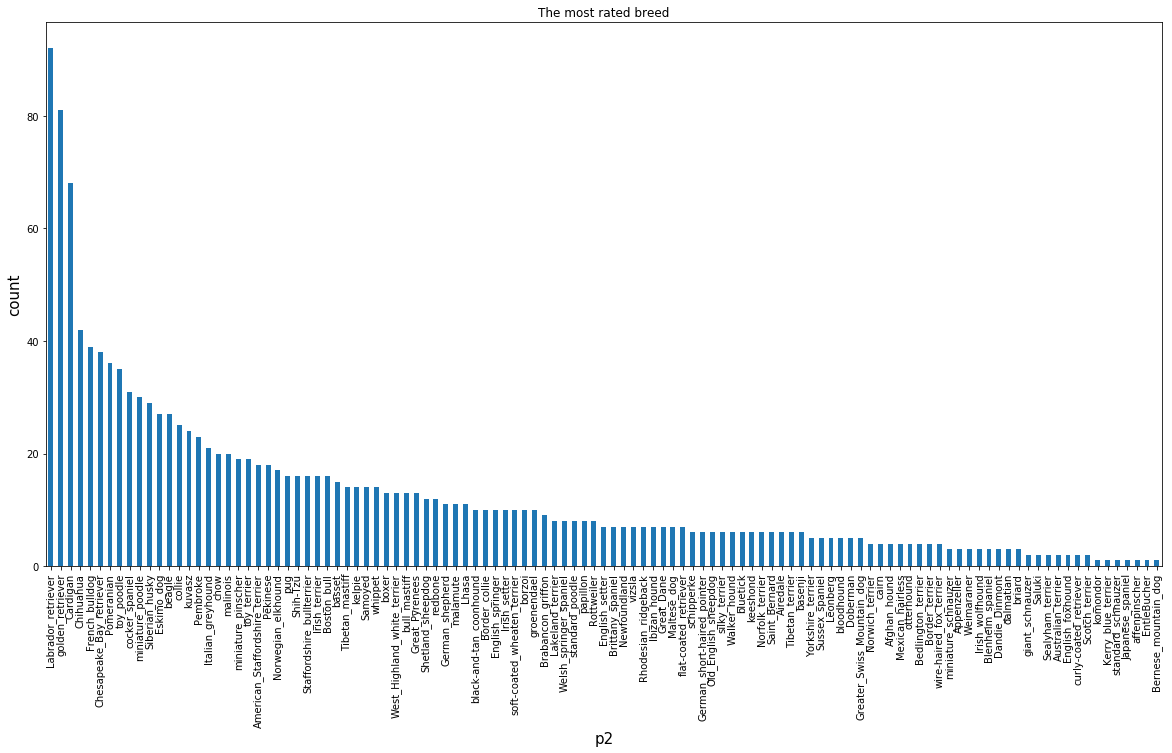

In [117]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p2_dog==True].p2.value_counts().plot(kind='bar', figsize=(20,10));
plt.title("The most rated breed");
plt.xlabel("p2", fontsize=15);
plt.ylabel("count", fontsize=15);

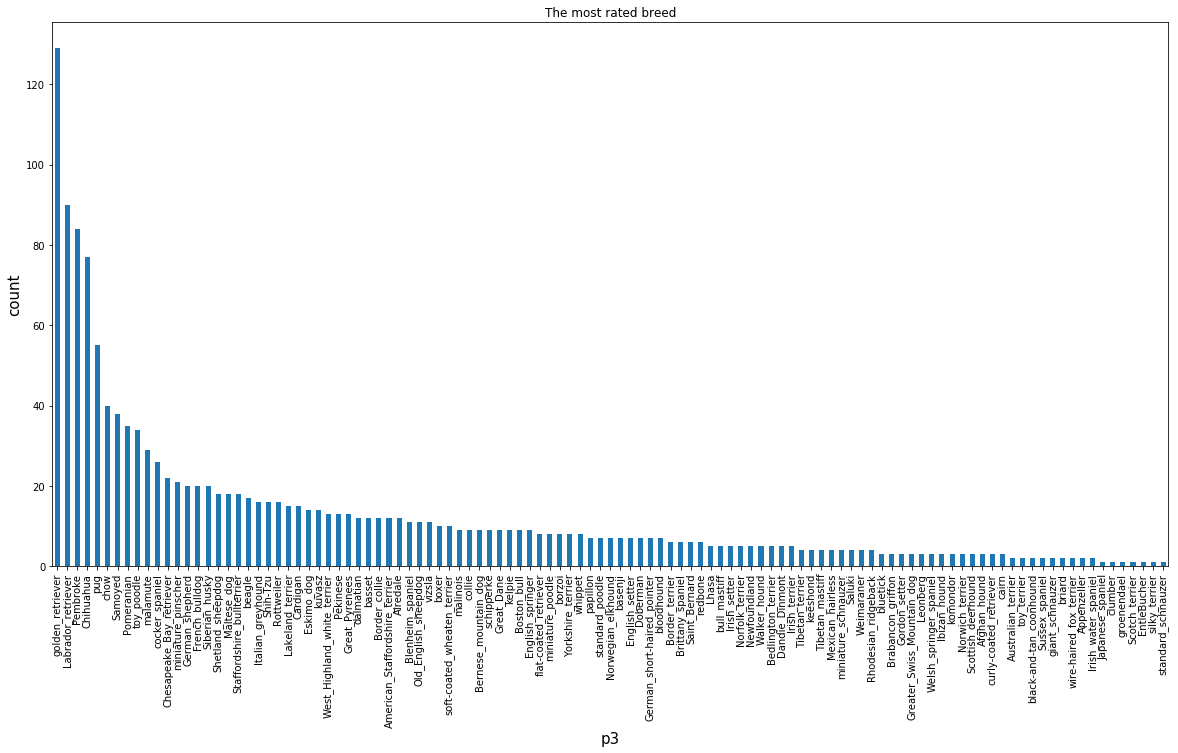

In [118]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p1_dog==True].p1.value_counts().plot(kind='bar', figsize=(20,10));
plt.title("The most rated breed");
plt.xlabel("p3", fontsize=15);
plt.ylabel("count", fontsize=15);

The neural network can recognize Labrador retriever and  golden retriever well or there are many dog of these beers

In [119]:
WeRateDogs_image_predictions.p1.value_counts().sort_values(ascending=False)

golden_retriever             129
Labrador_retriever            90
Pembroke                      84
Chihuahua                     77
pug                           55
chow                          40
Samoyed                       38
Pomeranian                    35
toy_poodle                    34
malamute                      29
cocker_spaniel                26
Chesapeake_Bay_retriever      22
miniature_pinscher            21
seat_belt                     21
Siberian_husky                20
German_shepherd               20
French_bulldog                20
Maltese_dog                   18
Staffordshire_bullterrier     18
Shetland_sheepdog             18
beagle                        17
teddy                         17
web_site                      17
Shih-Tzu                      16
Italian_greyhound             16
Rottweiler                    16
Cardigan                      15
Lakeland_terrier              15
Eskimo_dog                    14
kuvasz                        14
          

In [120]:
WeRateDogs_image_predictions.p2.value_counts().sort_values(ascending=False)

Labrador_retriever                92
golden_retriever                  81
Cardigan                          68
Chihuahua                         42
French_bulldog                    39
Chesapeake_Bay_retriever          38
Pomeranian                        36
toy_poodle                        35
cocker_spaniel                    31
miniature_poodle                  30
Siberian_husky                    29
Eskimo_dog                        27
beagle                            27
collie                            25
kuvasz                            24
Pembroke                          23
Italian_greyhound                 21
malinois                          20
chow                              20
miniature_pinscher                19
toy_terrier                       19
Pekinese                          18
American_Staffordshire_terrier    18
Norwegian_elkhound                17
Staffordshire_bullterrier         16
Irish_terrier                     16
pug                               16
S

In [121]:
WeRateDogs_image_predictions.p3.value_counts().sort_values(ascending=False)

Labrador_retriever                71
Chihuahua                         57
golden_retriever                  45
Eskimo_dog                        36
kelpie                            33
kuvasz                            30
cocker_spaniel                    29
chow                              28
Pekinese                          28
Staffordshire_bullterrier         27
toy_poodle                        27
Pomeranian                        26
beagle                            26
French_bulldog                    25
Great_Pyrenees                    24
Pembroke                          24
malamute                          23
Cardigan                          23
American_Staffordshire_terrier    22
Chesapeake_Bay_retriever          21
bull_mastiff                      19
Siberian_husky                    19
toy_terrier                       17
Boston_bull                       17
pug                               17
Shetland_sheepdog                 16
Lakeland_terrier                  16
b

Then Labrador_retriever and golden_retriever get the most because most of the dogs breed are them,
this mean that the WeRateDogs love these breed or users send many of this to them

In [122]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p1 == 'Labrador_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,9.000000e+01,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,7.484579e+17,11.144444,10.0,1.155556,0.658826,0.141485,0.053129,NaN,NaN
std,7.064697e+16,1.320207,0.0,0.471934,0.235839,0.104626,0.051009,NaN,NaN
min,6.667012e+17,7.000000,10.0,1.000000,0.195835,0.000098,0.000008,NaN,NaN
25%,6.788425e+17,10.000000,10.0,1.000000,0.459328,0.051085,0.015469,NaN,NaN
50%,7.448288e+17,11.000000,10.0,1.000000,0.714242,0.126372,0.034565,NaN,NaN
75%,8.069105e+17,12.000000,10.0,1.000000,0.866493,0.195473,0.076599,NaN,NaN
max,8.853116e+17,13.000000,10.0,4.000000,0.999885,0.403420,0.184246,NaN,NaN


In [123]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p1 == 'golden_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.290000e+02,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,0.0,0.0
mean,7.605093e+17,11.769657,10.0,1.302326,0.722640,0.113580,0.044227,NaN,NaN
std,6.716246e+16,2.374685,0.0,0.632513,0.222584,0.098649,0.046270,NaN,NaN
min,6.660638e+17,5.000000,10.0,1.000000,0.140394,0.001948,0.000453,NaN,NaN
25%,7.026849e+17,11.000000,10.0,1.000000,0.605304,0.036477,0.008786,NaN,NaN
50%,7.597934e+17,12.000000,10.0,1.000000,0.775930,0.091992,0.025144,NaN,NaN
75%,8.130517e+17,12.000000,10.0,1.000000,0.903529,0.173252,0.072427,NaN,NaN
max,8.895311e+17,34.285714,10.0,4.000000,0.993830,0.454937,0.203163,NaN,NaN


In [124]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p2 == 'Labrador_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,9.200000e+01,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,0.0,0.0
mean,7.731789e+17,11.684783,10.0,1.304348,0.704568,0.119469,0.041297,NaN,NaN
std,7.045583e+16,1.366228,0.0,0.641755,0.253827,0.104736,0.048030,NaN,NaN
min,6.664547e+17,5.000000,10.0,1.000000,0.072885,0.000010,0.000001,NaN,NaN
25%,7.063800e+17,11.000000,10.0,1.000000,0.557956,0.040853,0.005478,NaN,NaN
50%,7.767703e+17,12.000000,10.0,1.000000,0.777851,0.095600,0.019660,NaN,NaN
75%,8.242501e+17,13.000000,10.0,1.000000,0.921061,0.174845,0.069963,NaN,NaN
max,8.916896e+17,14.000000,10.0,4.000000,0.999984,0.454937,0.203163,NaN,NaN


In [125]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p2 == 'golden_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,8.100000e+01,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,0.0,0.0
mean,7.562990e+17,11.333333,10.0,1.185185,0.583889,0.167703,0.065669,NaN,NaN
std,6.360566e+16,1.440486,0.0,0.572519,0.255054,0.114803,0.056734,NaN,NaN
min,6.675026e+17,5.000000,10.0,1.000000,0.088530,0.000087,0.000008,NaN,NaN
25%,6.849270e+17,11.000000,10.0,1.000000,0.372776,0.072702,0.019585,NaN,NaN
50%,7.675005e+17,12.000000,10.0,1.000000,0.530915,0.162850,0.056548,NaN,NaN
75%,8.098089e+17,12.000000,10.0,1.000000,0.816044,0.263665,0.090032,NaN,NaN
max,8.776112e+17,14.000000,10.0,4.000000,0.999885,0.403420,0.270673,NaN,NaN


In [126]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p3 == 'Labrador_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,7.100000e+01,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,0.0,0.0
mean,7.434016e+17,11.440644,10.0,1.225352,0.626994,0.134758,0.067705,NaN,NaN
std,6.566052e+16,3.149691,0.0,0.539767,0.251993,0.093836,0.056568,NaN,NaN
min,6.660638e+17,5.000000,10.0,1.000000,0.140394,0.006790,0.004325,NaN,NaN
25%,6.807199e+17,10.000000,10.0,1.000000,0.372965,0.054609,0.023830,NaN,NaN
50%,7.271754e+17,12.000000,10.0,1.000000,0.701852,0.120184,0.047704,NaN,NaN
75%,8.080721e+17,12.000000,10.0,1.000000,0.856014,0.193672,0.094944,NaN,NaN
max,8.889172e+17,34.285714,10.0,4.000000,0.981652,0.391710,0.270673,NaN,NaN


In [127]:
WeRateDogs_image_predictions[WeRateDogs_image_predictions.p3 == 'golden_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,4.500000e+01,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,0.0,0.0
mean,7.400073e+17,11.266667,10.0,1.044444,0.581806,0.146643,0.078860,NaN,NaN
std,6.635957e+16,1.286291,0.0,0.208409,0.260624,0.100432,0.057513,NaN,NaN
min,6.660571e+17,7.000000,10.0,1.000000,0.100499,0.000547,0.000360,NaN,NaN
25%,6.790475e+17,11.000000,10.0,1.000000,0.368161,0.049480,0.023359,NaN,NaN
50%,7.167911e+17,11.000000,10.0,1.000000,0.529012,0.150487,0.079406,NaN,NaN
75%,7.907233e+17,12.000000,10.0,1.000000,0.779137,0.211424,0.129643,NaN,NaN
max,8.820459e+17,13.000000,10.0,2.000000,0.998673,0.350973,0.180023,NaN,NaN


All mean and medain is 11 or 12 not very high, then the users who send all of these photos

### Store

In [128]:
# lets check the tables first then save it
WeRateDogs_image_predictions.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,No stage,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,No stage,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,No stage,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,No stage,1.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,No stage,2.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN


In [129]:
df_WeRateDogs_twitter_archive_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,No stage
1,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,No stage
2,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,No stage
3,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,No stage
4,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,No stage


looks great lets save it using [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [130]:
df_WeRateDogs_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

Let's save the other one by [to_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html)

In [131]:
import sqlite3
conn = sqlite3.connect('all_columns.db')

In [132]:
WeRateDogs_image_predictions.to_sql('all_columns.db', con=conn, index=False)

In [133]:
conn.close()